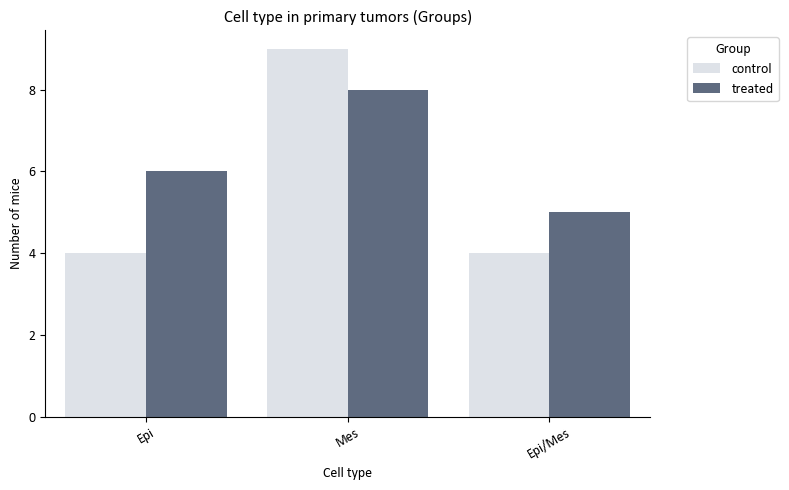

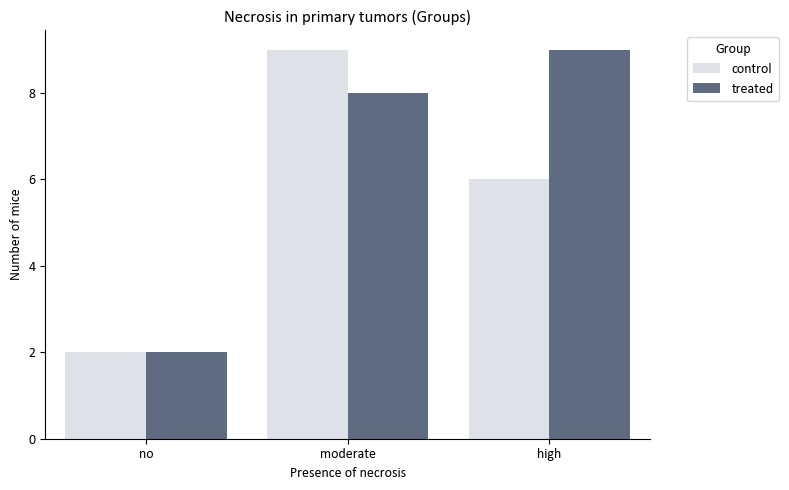

Chi² - Cell type vs Group: p = 0.7944
Chi² - Necrosis vs Group: p = 0.7598
Chi² - Liver metastasis vs Necrosis: p = 0.7837
Chi² - Liver metastasis vs Cell type: p = 0.6633
Chi² - Liver abscess vs Cell type: p = 0.7674
Chi² - Liver abscess vs Necrosis: p = 0.4516


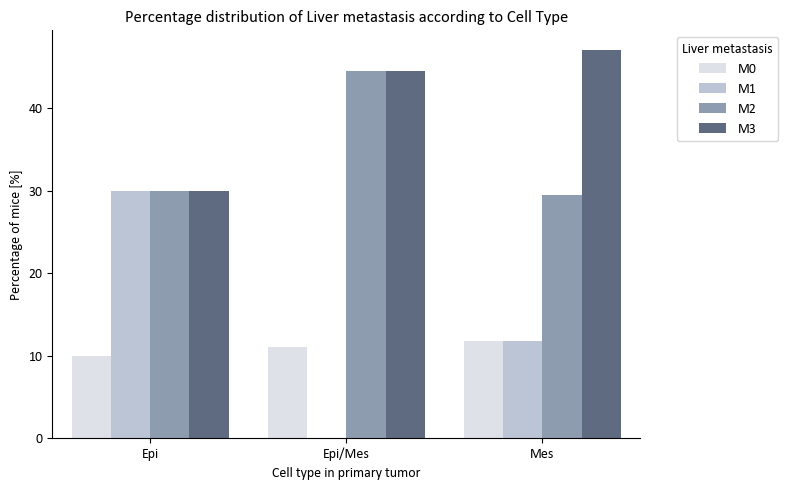

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Set font for plots
plt.rcParams['font.family'] = 'Calibri'

# Load data
df = pd.read_excel("UTF-8Lista przerzutów_CTC_13.05.2025.xlsx", sheet_name="Arkusz1")
df = df[df['Necrosis'] != 'no info']  # Exclude rows with missing necrosis info

# Define color palettes
colors = ["#DCE1EA", "#5A6A85"]
colors_full = ["#DCE1EA", "#B7C4D9", "#899BB5", "#5A6A85"]

# Plot 1 – Cell type distribution by group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Cell Type', hue='Group', palette=colors)
plt.title('Cell type in primary tumors (Groups)')
plt.xlabel('Cell type')
plt.ylabel('Number of mice')
plt.xticks(rotation=30)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.tight_layout()
#plt.savefig('Cell type in primary tumors (Groups)_poster.png')
plt.show()

# Plot 2 – Necrosis distribution by group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Necrosis', hue='Group', palette=colors)
plt.title('Necrosis in primary tumors (Groups)')
plt.xlabel('Presence of necrosis')
plt.ylabel('Number of mice')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.tight_layout()
#plt.savefig('Necrosis in primary tumors (Groups)_poster.png')
plt.show()

# Chi-squared tests
# 1. Cell Type vs Group
contingency1 = pd.crosstab(df['Cell Type'], df['Group'])
chi2_1, p_1, _, _ = chi2_contingency(contingency1)
print("Chi² - Cell type vs Group: p =", round(p_1, 4))

# 2. Necrosis vs Group
contingency2 = pd.crosstab(df['Necrosis'], df['Group'])
chi2_2, p_2, _, _ = chi2_contingency(contingency2)
print("Chi² - Necrosis vs Group: p =", round(p_2, 4))

# 3. Liver metastasis vs Necrosis
contingency3 = pd.crosstab(df['Liver metastasis'], df['Necrosis'])
chi2_3, p_3, _, _ = chi2_contingency(contingency3)
print("Chi² - Liver metastasis vs Necrosis: p =", round(p_3, 4))

# 4. Liver metastasis vs Cell Type
contingency4 = pd.crosstab(df['Liver metastasis'], df['Cell Type'])
chi2_4, p_4, _, _ = chi2_contingency(contingency4)
print("Chi² - Liver metastasis vs Cell type: p =", round(p_4, 4))

# 5. Liver abscess vs Cell Type
contingency5 = pd.crosstab(df['Liver - abscess'], df['Cell Type'])
chi2_5, p_5, _, _ = chi2_contingency(contingency5)
print("Chi² - Liver abscess vs Cell type: p =", round(p_5, 4))

# 6. Liver abscess vs Necrosis
contingency6 = pd.crosstab(df['Liver - abscess'], df['Necrosis'])
chi2_6, p_6, _, _ = chi2_contingency(contingency6)
print("Chi² - Liver abscess vs Necrosis: p =", round(p_6, 4))

# Plot – Percentage distribution of liver metastasis by cell type
ct = pd.crosstab(df['Cell Type'], df['Liver metastasis'], normalize='index') * 100
ct = ct.reset_index().melt(id_vars='Cell Type', var_name='Liver metastasis', value_name='Percentage')

plt.figure(figsize=(8, 5))
sns.barplot(data=ct, x='Cell Type', y='Percentage', hue='Liver metastasis', palette=colors_full)
plt.title('Percentage distribution of Liver metastasis according to Cell Type')
plt.xlabel('Cell type in primary tumor')
plt.ylabel('Percentage of mice [%]')
plt.legend(title='Liver metastasis', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.tight_layout()
#plt.savefig('Percentage distribution of Liver metastasis according to Cell Type_poster.png')
plt.show()